In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv(r'C:\Users\Anshul Pratap\Downloads\Predicting-Heart-Disease-master\Predicting-Heart-Disease-master\dataset.csv')

In [10]:
data.head() #short look on dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


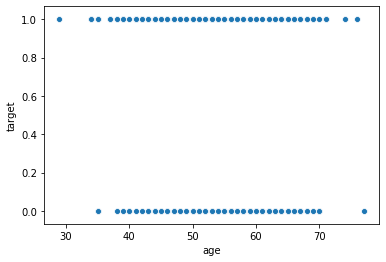

In [14]:
sns.scatterplot(data['age'],data['target'],data=data)

In [39]:
# finding correlations
corr = data.corr()
corr['target'].sort_values(ascending=False)


target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15703F50>,
      dtype=object)

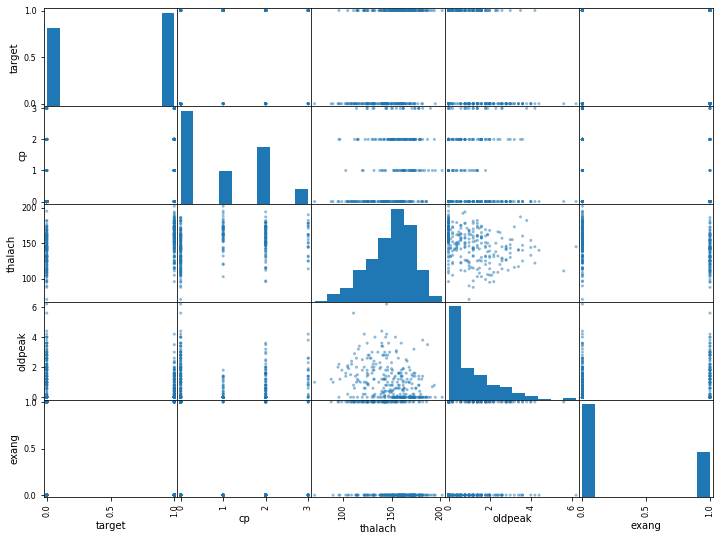

In [42]:
attr = ['target','cp','thalach','oldpeak','exang']
from pandas.plotting import scatter_matrix
scatter_matrix(data[attr],figsize=(12,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x156EA5B0>,
      dtype=object)

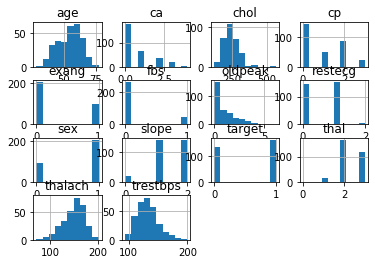

In [49]:
data.hist()

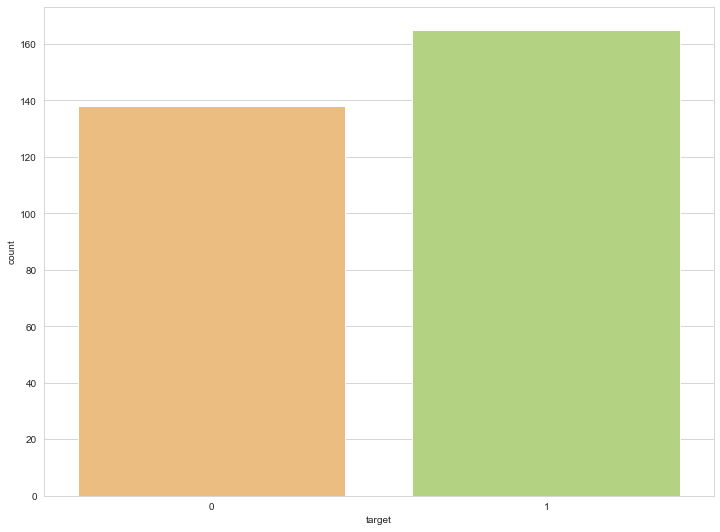

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,9))
sns.countplot(x='target', data=data, palette='RdYlGn')

In [58]:
X = data.drop(columns=['target'],axis=1)
Y = data['target'].copy()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [60]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [62]:
sc = StandardScaler()
X_train_fit = sc.fit(X_train)

In [64]:
X_train_fit.mean_

array([5.48512397e+01, 6.73553719e-01, 9.66942149e-01, 1.31805785e+02,
       2.46760331e+02, 1.48760331e-01, 5.20661157e-01, 1.49826446e+02,
       3.34710744e-01, 1.06322314e+00, 1.40909091e+00, 7.27272727e-01,
       2.28925620e+00])

In [69]:
X_train_sc = sc.transform(X_train) 

In [70]:
x_test_sc  = sc.transform(x_test)

In [71]:
X_train_data = pd.DataFrame(X_train_sc,columns = X_train.columns)

In [72]:
x_test_data = pd.DataFrame(x_test_sc,columns = x_test.columns)

## model building and selection

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_score = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train_data,Y_train, cv=10)
    knn_score.append(scores.mean())

0.8471666666666667

Text(0.5, 1.0, 'kneighbors for different scores')

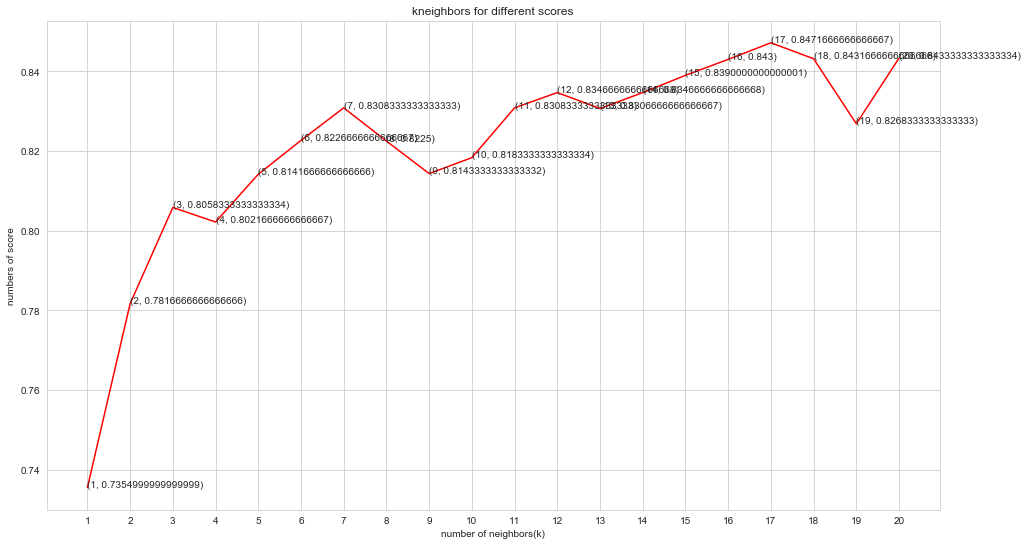

In [88]:
plt.figure(figsize=(16,9))
plt.plot([k for k in range(1,21)],knn_score, color='red')
for i in range(1,21):
    plt.text(i,knn_score[i-1],(i,knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel(r'number of neighbors(k)')
plt.ylabel(r'numbers of score')
plt.title("kneighbors for different scores")

In [93]:
knn = KNeighborsClassifier(n_neighbors=17)
scores = cross_val_score(knn, X_train_data,Y_train, cv=10)
print(f" KNeighbors Accuracy : {scores.mean()}")

 KNeighbors Accuracy : 0.8471666666666667


In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_data,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
pred = model.predict(x_test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [99]:
accuracy = cross_val_score(model, X_train_data,Y_train)

In [103]:
print(f"accuracy : {accuracy.mean()}")

accuracy : 0.7315476190476191


In [104]:
from sklearn.ensemble import RandomForestClassifier
modelR = RandomForestClassifier()
modelR.fit(X_train_data,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
predic = modelR.predict(x_test_data)

In [107]:
acc = cross_val_score(modelR,X_train_data,Y_train)

In [112]:
print(f"accuracy : {acc.mean()}")

accuracy : 0.8311224489795919
